# Matrices de pixels et images

**But :** effectuer des manipulations sur les tableaux à deux dimensions. Les images en sont un exemple.

On pourra utiliser les instructions suivantes : 

Pour importer le module dédié aux traitements d’images :

```Python
from PIL import Image
```

Pour ouvrir un fichier `fichier_image` contenant une image :

```Python
image = Image.open(fichier_image)
```

Pour obtenir les dimensions de l’image :

```Python
(L,H) = image.size 
```

Pour créer une image de dimensions largeur$\times$hauteur (fond blanc) : 

```Python
img = Image.new("RGB", (largeur, hauteur), "#FFFFFF")
```

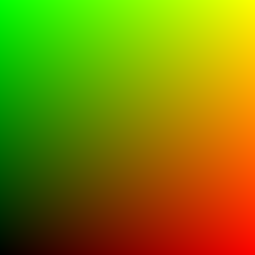

In [1]:
from PIL import Image

img = Image.new("RGB", (255,255))

for i in range(255):
    for j in range(255):
        img.putpixel((j, i), (j, 255-i, 0))
img.show()

Si on remplace `RGB` par `L`, on obtient une image en niveaux de gris. 

Pour obtenir un pixel de `image` et stocker sa valeur dans la variable p :

```Python
p = image.getpixel((j, i))
# p est le triplet des composantes RGB
```

avec `i` qui correspond à un indice selon un axe vertical (`i` varie de 0 à H-1) et j selon un axe horizontal (`j` varie de 0 à L-1)

Pour changer la valeur d’un pixel :
```Python
img.putpixel((j, i), p)
```

Pour enregistrer `img` :
```Python
img.save("image_reduite.png", "png")
```

Pour fermer le fichier image :
```Python
image.close()
```

## Algorithme de réduction 

<font size="5">🐍</font> Ecrire une fonction `reduction(fichier_image, coeff)` qui prend en argument un nom de fichier (donc une chaîne de caractères) et un coefficient `coeff`, et qui crée une nouvelle image, réduite d’un facteur `coeff` par rapport à l’image en argument. 

In [2]:
def reduction(fichier_image, coeff: int):
    # On ouvre l'image d'origine
    image = Image.open(fichier_image)

    # On récupère ses dimensions
    L, H = image.size

    # On calcule les dimensions de l'image finale
    largeur, hauteur = L//coeff, H//coeff

    # On crée la nouvelle image
    img = Image.new("RGB", (largeur, hauteur))

    # On la remplit...
    for i in range(hauteur):
        for j in range(largeur):
            p = image.getpixel((j*coeff, i*coeff))
            # On modifie le pixel (i,j)
            img.putpixel((j, i), p)

    # On l'enregistre
    img.save("small_"+fichier_image)

In [3]:
reduction("snowman.jpg", 5)

⮚ On obtient une image granuleuse. Pour éviter cet effet, on pourrait faire une moyenne des pixels d'un carré de taille `coeff`$\times$`coeff`

In [4]:
def somme(L: list):
    s = 0
    for x in L:
        s = s + x
    return s


def reduction(fichier_image, coeff: int):
    # On ouvre l'image d'origine
    image = Image.open(fichier_image)

    # On récupère ses dimensions
    L, H = image.size

    # On calcule les dimensions de l'image finale
    largeur, hauteur = L//coeff, H//coeff

    # On crée la nouvelle image
    img = Image.new("RGB", (largeur, hauteur))

    # On la remplit...
    for i in range(hauteur):
        for j in range(largeur):
            # Construction par compréhension de la liste des pixels à moyenner
            pixels = [image.getpixel((x, y)) for x in range(
                j*coeff, (j+1)*coeff) for y in range(i*coeff, (i+1)*coeff)]
            moy_rouge = somme([p[0] for p in pixels])//len(pixels)
            moy_vert = somme([p[1] for p in pixels])//len(pixels)
            moy_bleu = somme([p[2] for p in pixels])//len(pixels)
            # On modifie le pixel (i,j)
            img.putpixel((j, i), (moy_rouge, moy_vert, moy_bleu))

    # On l'enregistre
    img.save("small_bis_"+fichier_image)

In [5]:
reduction("squirrel.jpg", 5)

## Algorithme de rotation 

On s’intéresse à une rotation autour du centre de l’image, d’un angle θ.

<font size="5">👩🏻‍💻</font> On considère un point A de coordonnées (x,0) et son image B par une rotation de centre O(0,0) et d’angle θ dans le sens direct. Exprimer les coordonnées de B en fonction de x et de θ. 

⮚ Les coordonnées de $B$ sont $(x\cos(\theta), x \sin(\theta))$.

<font size="5">👨🏾‍💻</font> On considère un point C de coordonnées (0,y) et son image D par une rotation de centre O(0,0) et d’angle θ dans le sens direct. Exprimer les coordonnées de D en fonction de y et de θ. 

⮚ Les coordonnées de $D$ sont $(-y \sin(\theta), y \cos(\theta))$.

<font size="5">👩🏻‍💻</font> On considère un point E de coordonnées (x,y) et son image F par une rotation de centre O(0,0) et d’angle θ dans le sens direct. Exprimer les coordonnées de F en fonction de x, y et θ. 

⮚ Les coordonnées de $F$ sont $(x\cos(\theta) - y \sin(\theta), x \sin(\theta) + y \cos(\theta))$.

<font size="5">🐍</font> Écrire une fonction `rotation(fichier_image, theta)` qui prend en argument un nom de fichier (donc une chaîne de caractères) et un angle θ, et qui crée une image tournée d’un angle θ par rapport à l’image originale. 

In [6]:
import math as m

def rotation_coordonnees(x, y, theta):
    new_x = x*m.cos(theta) - y*m.sin(theta)
    new_y = x*m.sin(theta) + y*m.cos(theta)
    return int(new_x), int(new_y)

In [7]:
def rotation(fichier_image, theta):
    image = Image.open(fichier_image)
    L, H = image.size
    
    # On calcule les nouvelles coordonnées des coins
    xO, yO = 0,0
    xA, yA = rotation_coordonnees(L-1, 0, theta)
    xB, yB = rotation_coordonnees(0, H-1, theta)
    xC, yC = rotation_coordonnees(L-1, H-1, theta)
    
    x_min = min([xO, xA, xB, xC])
    x_max = max([xO, xA, xB, xC])
    
    y_min = min([yO, yA, yB, yC])
    y_max = max([yO, yA, yB, yC])
    
    largeur, hauteur = x_max - x_min + 1, y_max - y_min + 1
    
    img = Image.new("RGB", (largeur, hauteur))

    for i in range(H):
        for j in range(L):
            new_j, new_i = rotation_coordonnees(j,i, theta)
            new_i, new_j = new_i-y_min, new_j-x_min
            
            p = image.getpixel((j, i))
            # On modifie le pixel (i,j)
            if new_j < largeur and new_i < hauteur:
                img.putpixel((new_j, new_i), p)
    
    # On l'enregistre
    img.save("rotation_"+fichier_image)
            

In [8]:
rotation("small_squirrel.png",m.radians(150))

⮚ On remarque que l'image obtenue comporte des pixels noirs dus aux arrondis sur les coordonnées après rotation. Pour éviter ce phénomène, on peut parcourir chaque pixel de l'image d'arrivée pour calculer le meilleur pixel à prendre en compte.

On utilise le fait que la transformation inverse de la rotation de centre $O$ et d'angle de mesure $\theta$ est la rotation de centre $O$ et d'angle de mesure $-\theta$.

In [9]:
def rotation(fichier_image, theta):
    
    image = Image.open(fichier_image)
    (L, H) = image.size
    xa, ya = rotation_coordonnees(L-1, 0, theta)
    xb, yb = rotation_coordonnees(0, H-1, theta)
    xc, yc = rotation_coordonnees(L-1, H-1, theta)
    
    x_max = max([0, xa, xb, xc])
    x_min = min([0, xa, xb, xc])
    
    y_max = max([0, ya, yb, yc])
    y_min = min([0, ya, yb, yc])

    largeur, hauteur = x_max-x_min+1, y_max-y_min+1
    img = Image.new("RGB", (largeur, hauteur), "#000000")
    
    
    for i in range(hauteur):
        for j in range(largeur):
            old_j, old_i = rotation_coordonnees(j + x_min,i + y_min, -theta)
            
            if old_j >= 0 and old_j < L and old_i >=0 and old_i < H:
                p = image.getpixel((old_j,old_i))
            
                img.putpixel((j, i), p)
            
            
    img.save("rotation_bis_"+fichier_image)
    image.close()

In [10]:
rotation("small_squirrel.png",m.radians(150))

## Convolution : détection de contours

On veut modifier la valeur d’un pixel en prenant en compte les valeurs des pixels voisins, dans le but, par exemple, de détecter les contours. Par exemple :

![Figure](TP07.jpg "Figure")

Qu’en est-il pour un pixel appartenant à la bordure de l’image, car il n’a pas tous ses voisins ?

La solution la plus simple est d’ignorer ces pixels : on balaye l’image de la deuxième ligne à l’avant-dernière, et pour chaque ligne, de la deuxième colonne à l’avant-dernière. Mais on peut aussi étendre l’image initiale en rajoutant une bordure d’un pixel sur laquelle on duplique les pixels voisins par exemple, ou ceux de la ligne ou colonne opposée. 

Pour une détection de contour, on choisit par exemple la matrice suivante : 
```Python
[[-1,-1,-1],
[-1,8,-1],
[-1,-1,-1]]
```

Si tous les pixels autour d’un pixel donnés ont la même valeur, on obtient un résultat nul dans l’image qui a subi la convolution. Seuls les changements donnent un résultat non nul, ce qui est propice à la détection des contours. 

<font size="5">🐍</font> Écrire une fonction `convolution_contour(fichier_image, matrice)` qui prend en argument un nom de fichier (donc une chaîne de caractères) et une matrice (donc une liste de sous-listes), et qui crée une image à laquelle on a appliqué la convolution correspondante.  

In [ ]:
# À remplacer par votre code
raise NotImplementedError()

In [ ]:
convolution_contour("snowman.jpg", [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    